# INDEX
  * Importing Libraries
  * Importing data
  * Data Understanding
  * Duplicacy Removal
  * Data Cleaning and Oulier Removing
  * Data Preprosecing
  * Model Building
  * Model Evaluation

## 1. Introduction:
A census is the procedure of systematically acquiring and recording information about the members of a given population. The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

  ### 1.1 Data description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.
 
* 1.2 Features Description
   1. Categorical Attributes

 ** workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
Individual work category
 ** education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
Individual's highest education degree
 ** marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
Individual marital status
 ** occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
Individual's occupation
 ** relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
Individual's relation in a family
 ** race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
Race of Individual
** sex: Female, Male.
 ** native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Individual's native country
* 2. Continuous Attributes

age: continuous.
Age of an individual
fnlwgt: final weight, continuous.
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
Individual's working hour per week
* 1.3 Objective of this project
The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation. This is a classification problem.

## Importing Libraries and Data

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
import os
os.chdir("C://Users//KOMAL//Desktop//intern_data")

In [117]:
Names=["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation",
       "relationship", "race", "gender", "capital_gain", "capital_loss", "hours_per_week", "native_country", "salary"]

In [118]:
df= pd.read_csv('train.data', sep=',', names=Names)

In [119]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [120]:
ndict={" <=50K":0,
       " >50K":1}

In [121]:
df["salary_c"]=df["salary"].map(ndict)

In [122]:
df.drop("salary", axis=1, inplace=True)

In [123]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary_c
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [124]:
df_test=pd.read_csv("test.test", sep=",", names=Names)

In [125]:
df_test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [126]:
df_test.drop(0, inplace=True)
#remember you have changed the index, now it's from 1

In [127]:
df_test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [128]:
# droping salary column of test data set
stored_y=df_test.salary
df_test.drop("salary", axis=1, inplace=True)
df_test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States


## Understanding the data

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary_c        32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.7+ MB


In [130]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 1 to 16281
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16281 non-null  object 
 1   workclass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education_num   16281 non-null  float64
 5   marital_status  16281 non-null  object 
 6   occupation      16281 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   gender          16281 non-null  object 
 10  capital_gain    16281 non-null  float64
 11  capital_loss    16281 non-null  float64
 12  hours_per_week  16281 non-null  float64
 13  native_country  16281 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.3+ MB


In [131]:
df.head(30)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary_c
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [132]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,salary_c
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [133]:
df_test.describe()

,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [134]:
# first thing is sweetwiz , try to understand before doing changing any data
# I like to get the idea of my dat before making any changes with sweetwiz
import sweetviz as sw
# First_Profiling = sw.analyze(df)
# First_Profiling.show_html()

In [135]:
# increasing the no of rows of display to understand the data
pd.set_option("display.max_rows",100)

##  Checking duplicacy

In [136]:
df.duplicated().sum()

24

In [137]:
df.drop_duplicates(keep=False, inplace=True)

In [138]:
df_test.duplicated().sum()

6

In [139]:
df_test.drop_duplicates(keep=False, inplace=True)

### Data Cleaning and Outliers Removing

In [140]:
# First combining data so that cleaning is done only once
master= pd.concat([df,df_test])

In [141]:
master=master.reset_index()
master

,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary_c
0,0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0.0
1,1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0.0
2,2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0.0
3,3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0.0
4,4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48778,16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,NaN
48779,16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,NaN
48780,16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,NaN
48781,16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,NaN


In [142]:
master.drop("index",axis=1, inplace=True)
master

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary_c
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0.0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0.0
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0.0
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0.0
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48778,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,NaN
48779,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,NaN
48780,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,NaN
48781,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,NaN


In [143]:
master


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary_c
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0.0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0.0
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0.0
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0.0
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48778,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,NaN
48779,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,NaN
48780,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,NaN
48781,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,NaN


In [144]:
master.info()
# every column into ojbect

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48783 entries, 0 to 48782
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48783 non-null  object 
 1   workclass       48783 non-null  object 
 2   fnlwgt          48783 non-null  float64
 3   education       48783 non-null  object 
 4   education_num   48783 non-null  float64
 5   marital_status  48783 non-null  object 
 6   occupation      48783 non-null  object 
 7   relationship    48783 non-null  object 
 8   race            48783 non-null  object 
 9   gender          48783 non-null  object 
 10  capital_gain    48783 non-null  float64
 11  capital_loss    48783 non-null  float64
 12  hours_per_week  48783 non-null  float64
 13  native_country  48783 non-null  object 
 14  salary_c        32514 non-null  float64
dtypes: float64(6), object(9)
memory usage: 3.9+ MB


In [ ]:
#If columns are less, I like to go through each column one by one, so that I don't miss anything.

### 1. age


In [145]:
master["age"]=master.age.astype(int)

In [146]:
master.age.value_counts()

36    1348
33    1335
35    1335
23    1327
31    1325
34    1303
37    1278
28    1278
30    1274
38    1262
32    1253
41    1233
27    1230
29    1221
39    1204
24    1204
25    1190
40    1187
22    1178
42    1163
26    1153
20    1111
43    1104
45    1096
46    1093
21    1092
47    1081
44    1065
19    1045
51     877
50     866
18     860
48     845
49     843
52     738
53     711
55     621
54     613
17     595
56     564
58     555
57     551
59     523
61     450
60     449
62     394
64     340
63     335
65     284
67     238
66     237
68     178
69     149
70     133
72     120
71     118
73     108
74      77
75      72
76      69
77      54
90      53
80      38
81      37
78      34
79      30
82      15
84      13
83      11
88       6
85       5
87       3
89       2
86       1
Name: age, dtype: int64

In [147]:
master.age.value_counts().to_numpy()

array([1348, 1335, 1335, 1327, 1325, 1303, 1278, 1278, 1274, 1262, 1253,
       1233, 1230, 1221, 1204, 1204, 1190, 1187, 1178, 1163, 1153, 1111,
       1104, 1096, 1093, 1092, 1081, 1065, 1045,  877,  866,  860,  845,
        843,  738,  711,  621,  613,  595,  564,  555,  551,  523,  450,
        449,  394,  340,  335,  284,  238,  237,  178,  149,  133,  120,
        118,  108,   77,   72,   69,   54,   53,   38,   37,   34,   30,
         15,   13,   11,    6,    5,    3,    2,    1], dtype=int64)

In [148]:
# check all the possible values
master.age.value_counts().index.to_numpy()

array([36, 33, 35, 23, 31, 34, 37, 28, 30, 38, 32, 41, 27, 29, 39, 24, 25,
       40, 22, 42, 26, 20, 43, 45, 46, 21, 47, 44, 19, 51, 50, 18, 48, 49,
       52, 53, 55, 54, 17, 56, 58, 57, 59, 61, 60, 62, 64, 63, 65, 67, 66,
       68, 69, 70, 72, 71, 73, 74, 75, 76, 77, 90, 80, 81, 78, 79, 82, 84,
       83, 88, 85, 87, 89, 86], dtype=int64)

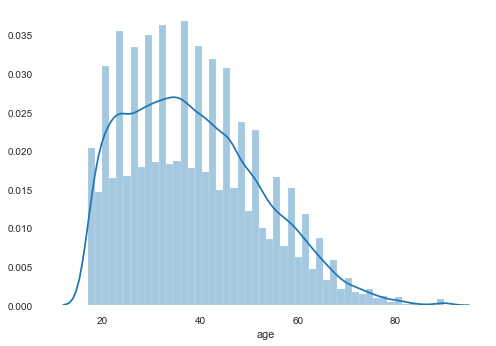

In [149]:
sns.distplot(master.age)

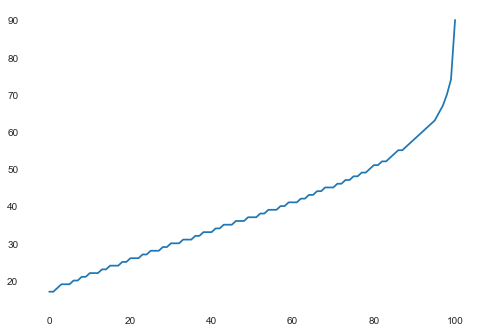

In [150]:
i=1
x=[]
quant=[]
for i in range(101):
    quant.append(master["age"].quantile(i/100))
    x.append(i)
plt.plot(x,quant)

In [151]:
quantile=np.array(quant)
quantile

array([17., 17., 18., 19., 19., 19., 20., 20., 21., 21., 22., 22., 22.,
       23., 23., 24., 24., 24., 25., 25., 26., 26., 26., 27., 27., 28.,
       28., 28., 29., 29., 30., 30., 30., 31., 31., 31., 32., 32., 33.,
       33., 33., 34., 34., 35., 35., 35., 36., 36., 36., 37., 37., 37.,
       38., 38., 39., 39., 39., 40., 40., 41., 41., 41., 42., 42., 43.,
       43., 44., 44., 45., 45., 45., 46., 46., 47., 47., 48., 48., 49.,
       49., 50., 51., 51., 52., 52., 53., 54., 55., 55., 56., 57., 58.,
       59., 60., 61., 62., 63., 65., 67., 70., 74., 90.])

In [152]:
master.age.loc[(master.age>=74)]=74

E:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### 2. Fnlwgt

In [153]:
master["fnlwgt"]=master.fnlwgt.astype(int)

In [154]:
master.fnlwgt.value_counts().index.to_numpy()

array([203488, 120277, 190290, ..., 198863, 264498, 208174], dtype=int64)

In [155]:
print(master.fnlwgt.dtype)

int32


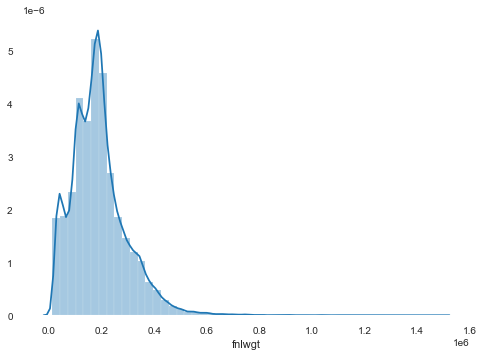

In [156]:
sns.distplot(master.fnlwgt)

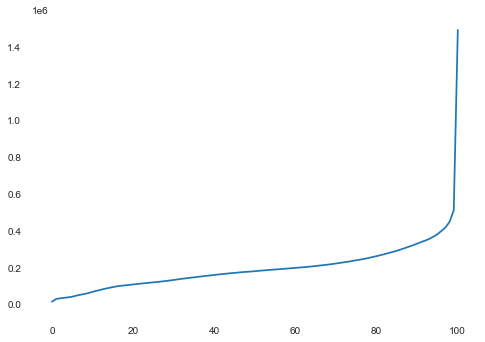

In [157]:
i=1
x=[]
quant=[]
for i in range(101):
    quant.append(master["fnlwgt"].quantile(i/100))
    x.append(i)
plt.plot(x,quant)

In [158]:
quantile=np.array(quant)
quantile

array([  12285.  ,   27165.28,   30794.92,   33432.  ,   36138.36,
         39630.  ,   45379.8 ,   50103.  ,   54318.  ,   59469.  ,
         65876.  ,   71650.52,   77146.  ,   82527.6 ,   87157.48,
         91666.  ,   95917.12,   98881.  ,  101345.  ,  103642.  ,
        106096.4 ,  108464.  ,  110916.16,  113150.44,  115432.36,
        117555.  ,  119684.  ,  122206.  ,  124941.92,  127610.  ,
        130695.4 ,  133696.  ,  136986.  ,  139464.12,  142566.  ,
        144939.1 ,  147629.  ,  150100.04,  152908.16,  155361.62,
        157932.  ,  160436.58,  162616.52,  164898.  ,  167159.  ,
        169085.9 ,  171088.  ,  173311.7 ,  174950.6 ,  176494.26,
        178136.  ,  180283.82,  182211.  ,  183919.22,  185836.  ,
        187577.4 ,  189147.76,  190822.74,  192588.56,  194427.9 ,
        196307.  ,  198188.16,  199997.52,  201985.32,  204057.  ,
        206514.4 ,  209057.  ,  211423.34,  214242.  ,  216867.  ,
        220118.6 ,  223492.16,  226735.  ,  230039.  ,  233912

In [159]:
master.fnlwgt.loc[(master.fnlwgt>=509523.22)]=509523.22

E:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)



### 3. workclass

In [160]:
master.workclass.value_counts()

 Private             33851
 Self-emp-not-inc     3860
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1693
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [161]:
#Nan values were as ? in data. Usually we fix this with most frequent element(mode) in the entire dataset.
# finding the reason of missing values

In [162]:
master[master.workclass==" ?"].head(60)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary_c
27,54,?,180211.00,Some-college,10.0,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0.0,0.0,60.0,South,1.0
61,32,?,293936.00,7th-8th,4.0,Married-spouse-absent,?,Not-in-family,White,Male,0.0,0.0,40.0,?,0.0
69,25,?,200681.00,Some-college,10.0,Never-married,?,Own-child,White,Male,0.0,0.0,40.0,United-States,0.0
77,67,?,212759.00,10th,6.0,Married-civ-spouse,?,Husband,White,Male,0.0,0.0,2.0,United-States,0.0
106,17,?,304873.00,10th,6.0,Never-married,?,Own-child,White,Female,34095.0,0.0,32.0,United-States,0.0
128,35,?,129305.00,HS-grad,9.0,Married-civ-spouse,?,Husband,White,Male,0.0,0.0,40.0,United-States,0.0
149,43,?,174662.00,Some-college,10.0,Divorced,?,Not-in-family,White,Female,0.0,0.0,40.0,United-States,0.0
154,52,?,252903.00,HS-grad,9.0,Divorced,?,Not-in-family,White,Male,0.0,0.0,45.0,United-States,1.0
160,68,?,38317.00,1st-4th,2.0,Divorced,?,Not-in-family,White,Female,0.0,0.0,20.0,United-States,0.0
187,53,?,135105.00,Bachelors,13.0,Divorced,?,Not-in-family,White,Female,0.0,0.0,50.0,United-States,0.0


In [163]:
master[master.workclass==" ?"].tail(60)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary_c
47931,28,?,49028.0,HS-grad,9.0,Never-married,?,Not-in-family,White,Female,0.0,0.0,40.0,United-States,NaN
47974,26,?,296372.0,HS-grad,9.0,Divorced,?,Own-child,White,Female,0.0,0.0,40.0,United-States,NaN
47983,45,?,83601.0,12th,8.0,Widowed,?,Unmarried,White,Female,0.0,0.0,70.0,United-States,NaN
48006,20,?,295763.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,40.0,United-States,NaN
48024,20,?,259865.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,25.0,Mexico,NaN
48028,46,?,110243.0,Masters,14.0,Married-civ-spouse,?,Husband,White,Male,0.0,1977.0,20.0,United-States,NaN
48033,19,?,234877.0,11th,7.0,Never-married,?,Own-child,White,Male,0.0,0.0,40.0,United-States,NaN
48054,20,?,386962.0,10th,6.0,Never-married,?,Own-child,White,Male,0.0,0.0,40.0,Mexico,NaN
48061,26,?,408417.0,Some-college,10.0,Married-AF-spouse,?,Husband,Black,Male,0.0,0.0,38.0,United-States,NaN
48077,18,?,158826.0,12th,8.0,Never-married,?,Own-child,Black,Female,0.0,0.0,15.0,United-States,NaN


In [164]:
# the work class is empty because there is no ocupation given, (only thing that makes sense to me)
# replacing it with new_category
master.workclass.replace(" ?", "new_category", inplace=True)

### 4. education

In [165]:
master.education.value_counts()

 HS-grad         15768
 Some-college    10860
 Bachelors        8015
 Masters          2655
 Assoc-voc        2059
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           953
 Prof-school       834
 9th               756
 12th              655
 Doctorate         594
 5th-6th           507
 1st-4th           244
 Preschool          81
Name: education, dtype: int64

In [166]:
# no suspious data found

### 5. education number

In [167]:
master["education_num"]=master.education_num.astype(int)

In [168]:
master.education_num.value_counts()

9     15768
10    10860
13     8015
14     2655
11     2059
7      1812
12     1601
6      1389
4       953
15      834
5       756
8       655
16      594
3       507
2       244
1        81
Name: education_num, dtype: int64

In [169]:
master.education_num.value_counts().sum()==master.education.value_counts().sum()

True

In [170]:
master.head(60)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary_c
0,39,State-gov,77516.00,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0.0
1,50,Self-emp-not-inc,83311.00,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0.0
2,38,Private,215646.00,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0.0
3,53,Private,234721.00,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0.0
4,28,Private,338409.00,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0.0
5,37,Private,284582.00,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,0.0
6,49,Private,160187.00,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,0.0
7,52,Self-emp-not-inc,209642.00,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,1.0
8,31,Private,45781.00,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,1.0
9,42,Private,159449.00,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,1.0


In [171]:
# after watching both the education and education_num , I have realised that education num is encoding for 
#education column , now it can drop education. I will drop it later.

In [172]:
master.marital_status.value_counts()

 Married-civ-spouse       22363
 Never-married            16080
 Divorced                  6627
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital_status, dtype: int64

In [173]:
# no cleaning is required

### 6. Ocupation

In [174]:
master.occupation.value_counts()

 Prof-specialty       6162
 Craft-repair         6102
 Exec-managerial      6082
 Adm-clerical         5605
 Sales                5504
 Other-service        4915
 Machine-op-inspct    3016
 ?                    2809
 Transport-moving     2353
 Handlers-cleaners    2070
 Farming-fishing      1484
 Tech-support         1444
 Protective-serv       983
 Priv-house-serv       239
 Armed-Forces           15
Name: occupation, dtype: int64

In [175]:
# the only difference bw occupation transport and work class is 9 people

In [176]:
#  ? - this data and my mind says its a different category which not working 
# or people were hiding their occupation
# proof needed

In [177]:
master.occupation.replace(" ?", " new_category", inplace=True)

In [178]:
#master.replace(" ?","new_category")

In [179]:
print(master.occupation.value_counts())
print(master.workclass.value_counts())

 Prof-specialty       6162
 Craft-repair         6102
 Exec-managerial      6082
 Adm-clerical         5605
 Sales                5504
 Other-service        4915
 Machine-op-inspct    3016
 new_category         2809
 Transport-moving     2353
 Handlers-cleaners    2070
 Farming-fishing      1484
 Tech-support         1444
 Protective-serv       983
 Priv-house-serv       239
 Armed-Forces           15
Name: occupation, dtype: int64
 Private             33851
 Self-emp-not-inc     3860
 Local-gov            3136
new_category          2799
 State-gov            1981
 Self-emp-inc         1693
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64


### 7. relationship

In [180]:
master.relationship.value_counts()

 Husband           19700
 Not-in-family     12552
 Own-child          7571
 Unmarried          5123
 Wife               2331
 Other-relative     1506
Name: relationship, dtype: int64

In [181]:
#  cleaning not required

### 8. race

In [182]:
master.race.value_counts()

 White                 41709
 Black                  4681
 Asian-Pac-Islander     1517
 Amer-Indian-Eskimo      470
 Other                   406
Name: race, dtype: int64

In [183]:
# cleaning is not required

### 9. GEnder

In [184]:
master.gender.value_counts()

 Male      32610
 Female    16173
Name: gender, dtype: int64

### 10. native_country

In [185]:
master.native_country.value_counts()

 United-States                 43786
 Mexico                          943
 ?                               855
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Poland                           87
 Vietnam                          86
 Guatemala                        85
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

In [186]:
# goind with central tendancy(mode)
master.native_country.replace(" ?"," United-States", inplace=True)

In [187]:
master.native_country.value_counts()

 United-States                 44641
 Mexico                          943
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Guatemala                        85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 Peru                             46
 

### 11. hours_per_week

In [188]:
master["hours_per_week"]=master.hours_per_week.astype(int)

In [189]:
master.hours_per_week.value_counts()

40    22770
50     4242
45     2715
60     2177
35     1933
20     1862
30     1698
55     1049
25      958
48      768
38      714
15      623
70      437
32      423
10      417
65      355
24      354
42      338
36      336
44      310
16      303
12      247
37      242
43      227
8       218
80      210
52      205
56      141
28      140
99      137
46      129
18      129
72      107
75      105
5        95
6        92
4        84
47       82
84       72
39       63
22       62
54       62
33       61
3        59
41       59
2        53
14       53
34       48
21       46
7        45
27       43
90       42
17       42
23       40
26       40
49       39
53       39
58       38
13       28
9        27
1        27
66       23
62       23
64       22
51       20
11       20
57       19
19       19
85       17
68       16
29       15
63       15
98       14
78       13
31       12
77        9
96        9
59        7
67        6
76        4
61        4
73        4
86        4
88  

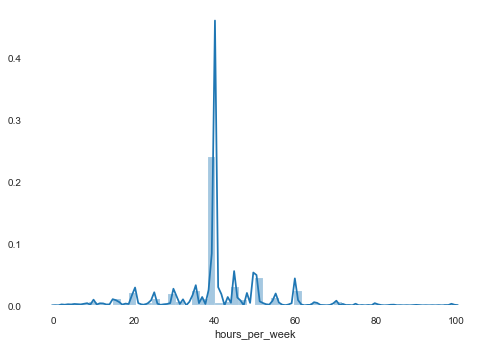

In [190]:
sns.distplot(master.hours_per_week)

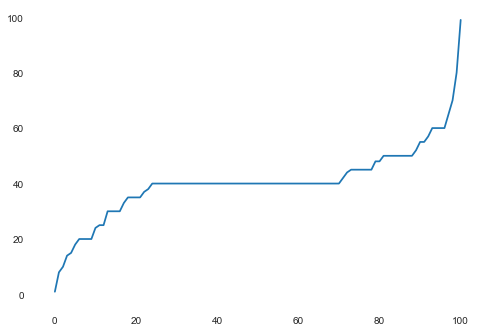

In [191]:
i=1
x=[]
quant=[]
for i in range(101):
    quant.append(master["hours_per_week"].quantile(i/100))
    x.append(i)
plt.plot(x,quant)

In [192]:
quantile=np.array(quant)
quantile

array([ 1.,  8., 10., 14., 15., 18., 20., 20., 20., 20., 24., 25., 25.,
       30., 30., 30., 30., 33., 35., 35., 35., 35., 37., 38., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 42., 44., 45., 45., 45., 45., 45.,
       45., 48., 48., 50., 50., 50., 50., 50., 50., 50., 50., 52., 55.,
       55., 57., 60., 60., 60., 60., 65., 70., 80., 99.])

In [193]:
master.hours_per_week.loc[(master.hours_per_week>=80)]=80

E:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### 12. capital_gain and loss

In [194]:
master["capital_gain"]=master.capital_gain.astype(int)

In [195]:
master.capital_gain.value_counts().index.to_numpy()

array([    0, 15024,  7688,  7298, 99999,  3103,  5178,  5013,  4386,
        8614,  3325,  2174, 10520,  4650, 27828,  4064,   594,  3137,
       20051, 14084,  3908,  6849, 13550,  2829,  1055,  4787,  3411,
       14344,  3464,  2597,  2176,  9386,  2885,  4101,  2202,  4865,
        2407,  4416,  1506,  4508,  3674,  2354,  2580, 10605,  2907,
        3942,  5455,  3781,  6418,  7430,  2463,  2105,  6497,  2635,
        2964, 25236,  1151,  2653,  3818,  2977,  3471,  6514,  1409,
         914,  2290, 15020,  1797,  2414,  4934,  1831,  1471,  1848,
         114, 15831, 10566,  2346,  3887,  1086,  3418,  2329,  3273,
        7443,  5721,  3456, 34095,  5556, 25124,   991,  6767,  1173,
        2036,  2228,   401,  9562,  2538,  6723,  2050, 11678,  2936,
        7896,  4931,  4687,  2961,  1455,  1424,  3432,  2062,  2993,
        2009,  6360, 41310,  6097,  5060, 18481,  1264,  7978,  7262,
        1731,  2387, 22040,  6612,  1111,  1639], dtype=int64)

E:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


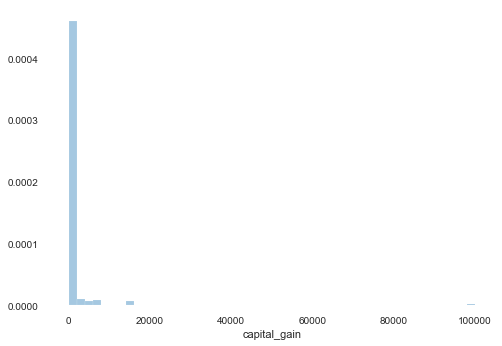

In [196]:
sns.distplot(master.capital_gain)

In [197]:
master["capital_loss"]=master.capital_loss.astype(int)

In [198]:
master.capital_loss.value_counts().index.to_numpy()

array([   0, 1902, 1977, 1887, 2415, 1485, 1848, 1590, 1602, 1876, 1740,
       1672, 1741, 1564, 2258, 1719, 1980, 2001, 1408, 1669, 2002, 1579,
       2051, 1974, 1721, 2339, 1504, 2377, 1628, 1762, 2444, 2179, 2205,
       2559,  625, 2057, 2824, 1573, 2042, 1651, 1092, 1617, 2392, 1340,
       1380, 2174, 1668, 1594, 1726, 2246, 2603, 2129, 2231, 2206,  880,
       1258, 1825, 3004,  323,  213, 2149, 2547, 2472, 2457, 1816, 3770,
       1138,  653, 2238, 1411, 4356,  419, 1944, 2267, 1510, 1735, 1429,
       1844, 1648, 3175, 2163, 2467, 3683, 2352, 2754, 2282, 3900,  810,
       1755,  974, 2080, 2465, 1911,  155, 1539, 2489, 2201, 1421, 1870],
      dtype=int64)

E:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


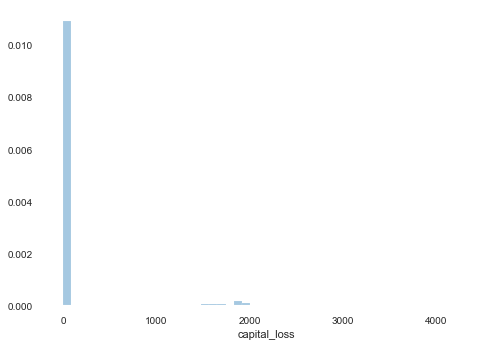

In [199]:
sns.distplot(master.capital_loss)

## Data Visualization

In [200]:
from pandas_profiling import ProfileReport
# After doing cleaning, I like to look data quickly with profile report

In [201]:
# ProfileReport(master)

In [202]:
dummy_train=master[master.salary_c.isna()==False]

In [203]:
sns.pairplot(dummy_train)

In [204]:
dummy_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary_c
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0.0
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0.0
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0.0
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0.0
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32509,27,Private,257302.0,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0.0
32510,40,Private,154374.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1.0
32511,58,Private,151910.0,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0.0
32512,22,Private,201490.0,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0.0


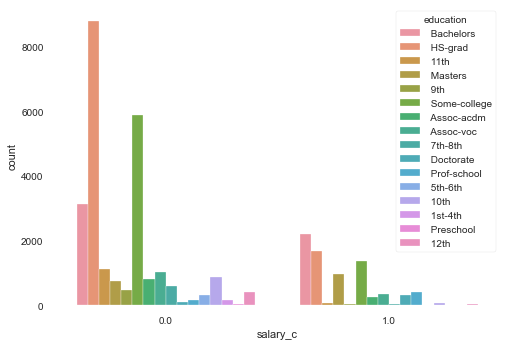

In [272]:
sns.countplot(x='salary_c', data=dummy_train, hue='education')
# This clearly shows education makes a big impact

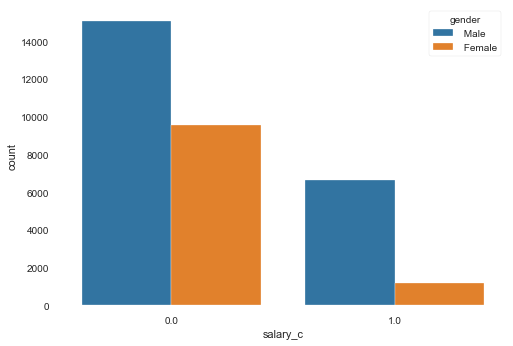

In [271]:
sns.countplot(x='salary_c', data=dummy_train, hue='gender')

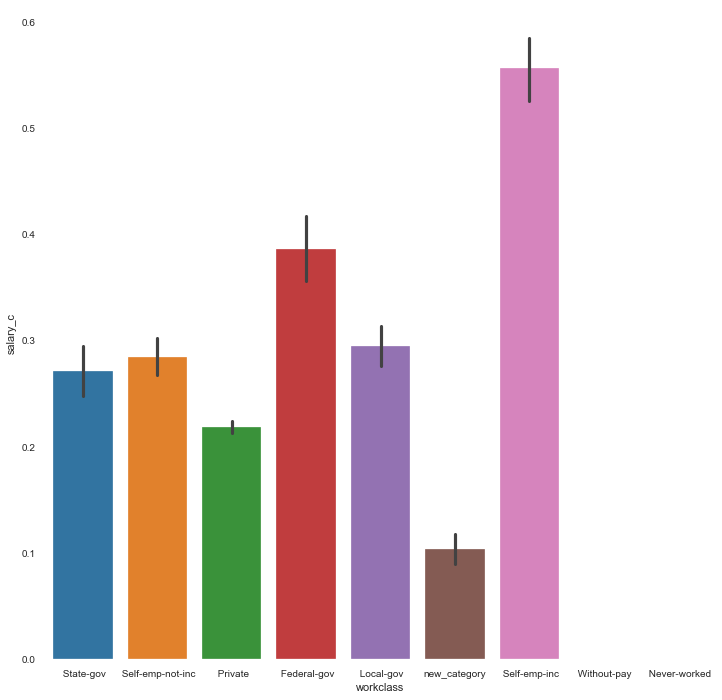

In [206]:
plt.figure(figsize=(12,12))
sns.barplot(x="workclass",y="salary_c", data=dummy_train)

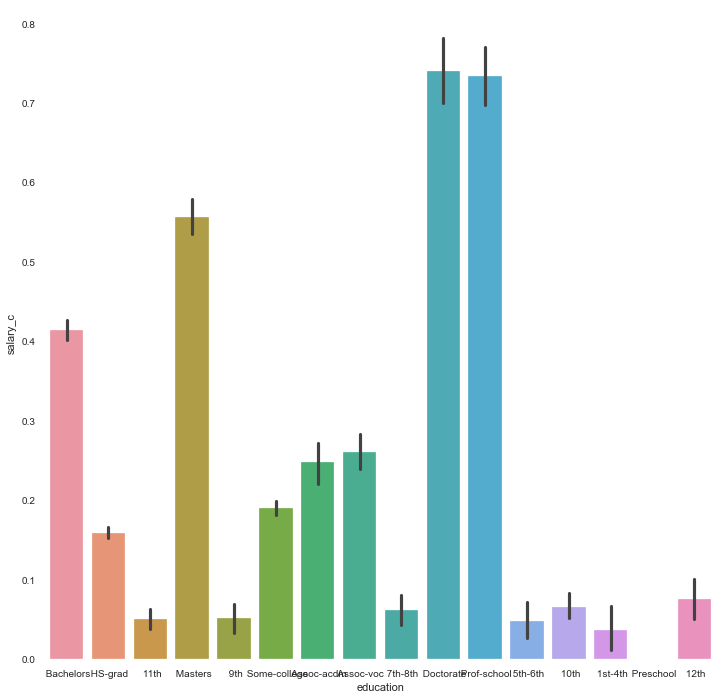

In [207]:
plt.figure(figsize=(12,12))
sns.barplot(x="education",y="salary_c", data=dummy_train)

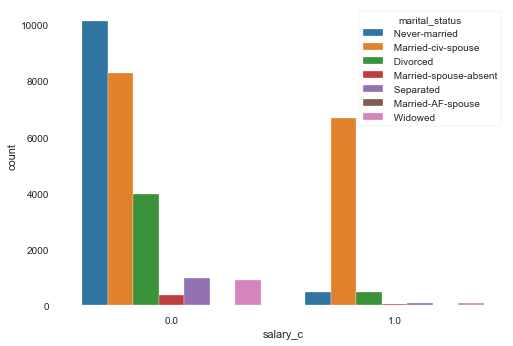

In [273]:
sns.countplot(x='salary_c', data=dummy_train, hue='marital_status')

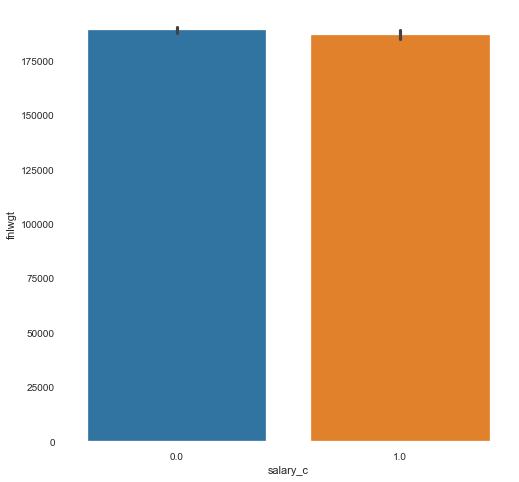

In [209]:
plt.figure(figsize=(8,8))
sns.barplot(x="salary_c",y="fnlwgt", data=dummy_train)

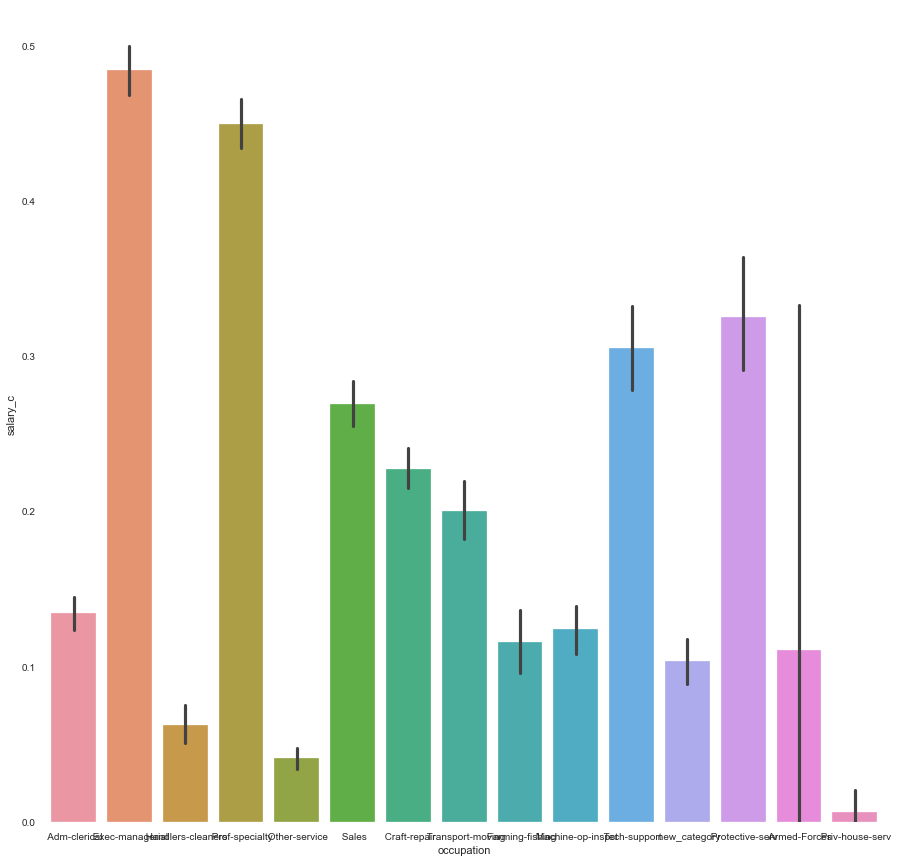

In [210]:
plt.figure(figsize=(15,15))
sns.barplot(x="occupation",y="salary_c", data=dummy_train)
# This variable is also important

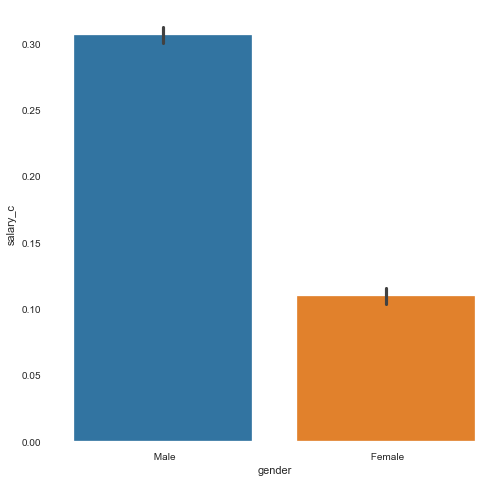

In [211]:
plt.figure(figsize=(8,8))
sns.barplot(x="gender",y="salary_c", data=dummy_train)
#male are more earning

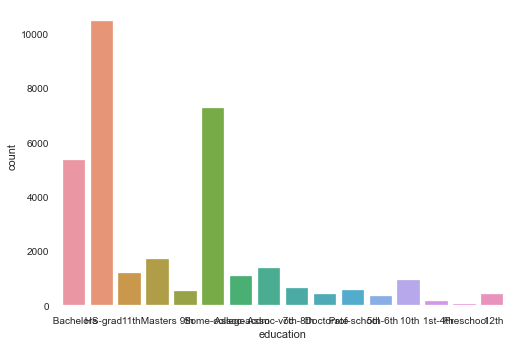

In [270]:
sns.countplot(dummy_train.education, label='count')

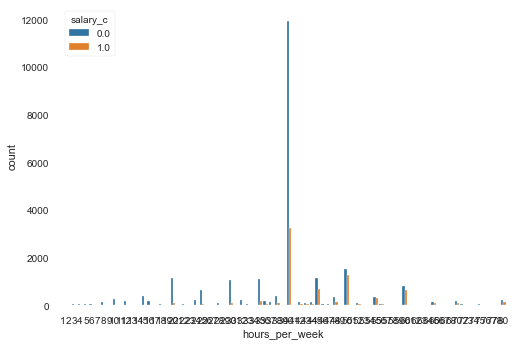

In [274]:
plt.figure(figsize=(12,12))
sns.barplot(x="hours_per_week",y="salary_c", data=dummy_train)
# Yes hours makes effect

In [ ]:
sns.catplot(x="workclass", y="fnlwgt", hue="gender", kind="swarm", data=dummy_train)

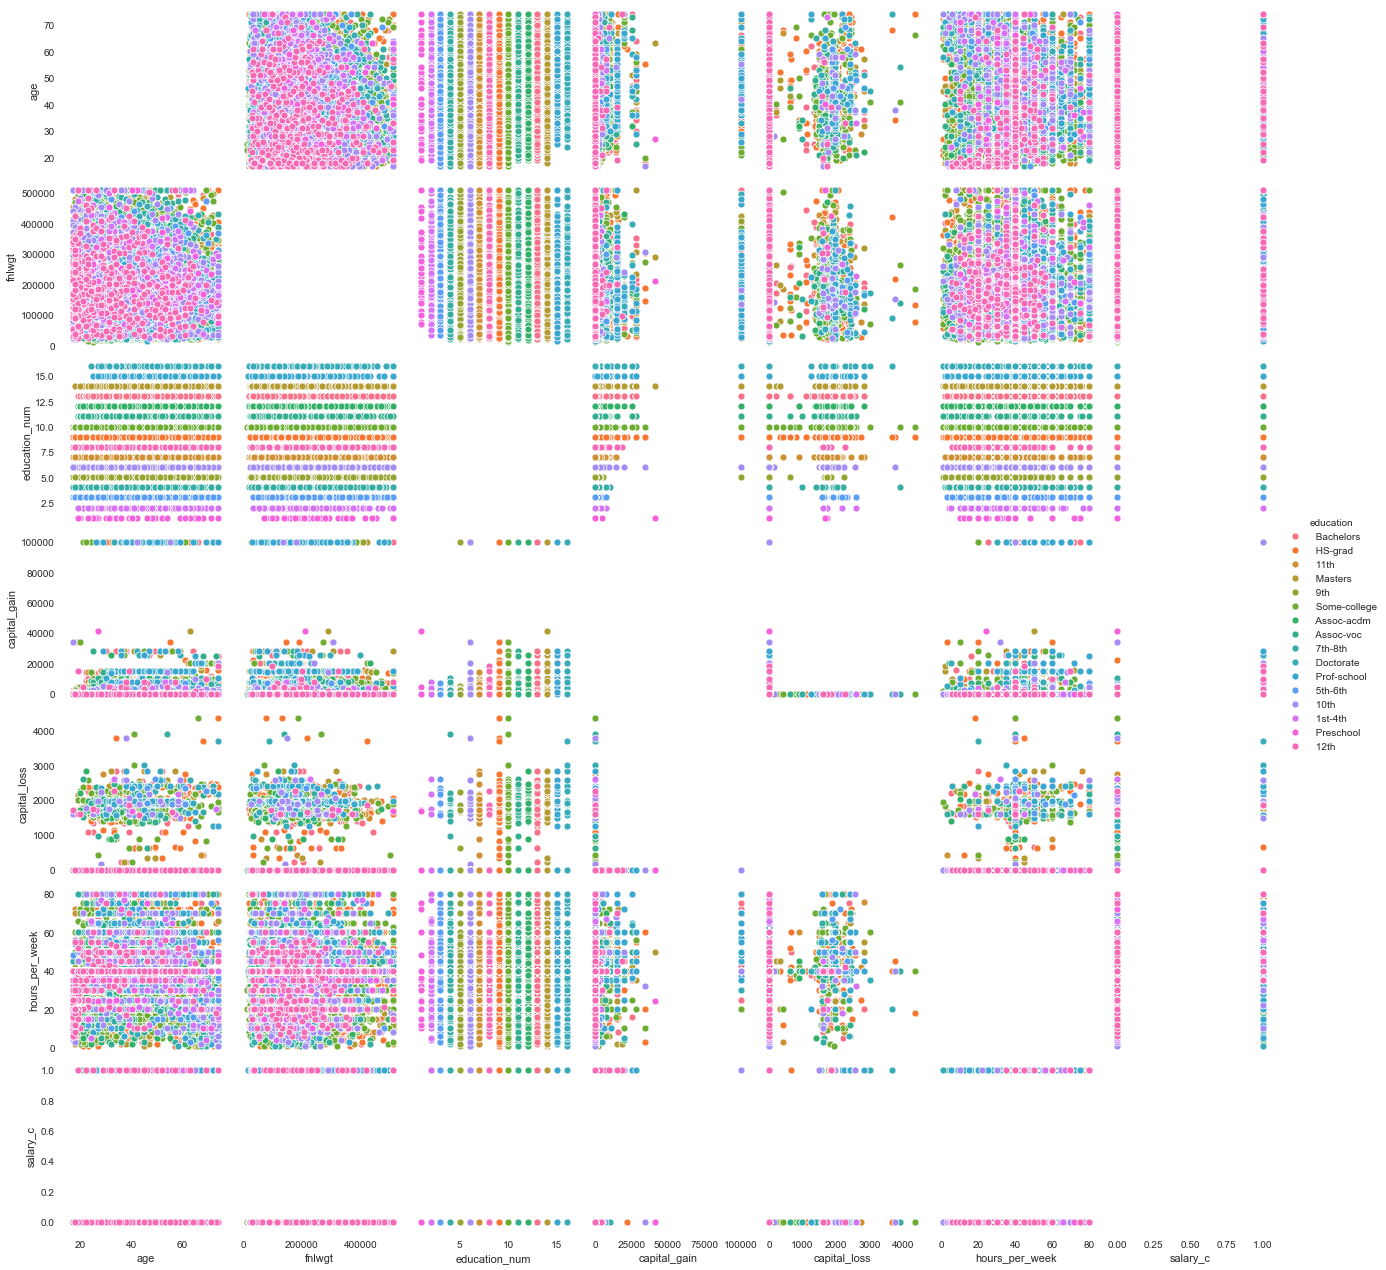

In [213]:
g = sns.PairGrid(dummy_train, hue="education")
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Data Preprocessing

### Scaling

In [214]:
# standerdization for age, fnlwgt, hoursperweek
from sklearn.preprocessing import StandardScaler
mnx=StandardScaler()
new2= pd.DataFrame(mnx.fit_transform(master[["age","fnlwgt","hours_per_week","education_num"]]), columns=["age","fnlwgt","hours_per_week","education_num"])

In [215]:
new2

,age,fnlwgt,hours_per_week,education_num
0,0.029646,-1.111197,-0.028590,1.136604
1,0.841299,-1.053123,-2.265856,1.136604
2,-0.044141,0.273043,-0.028590,-0.419944
3,1.062659,0.464199,-0.028590,-1.198217
4,-0.782007,1.503286,-0.028590,1.136604
...,...,...,...,...
48778,0.029646,0.270768,-0.360037,1.136604
48779,1.874312,1.332864,-0.028590,-0.419944
48780,-0.044141,1.869804,0.800027,1.136604
48781,0.398579,-1.047311,-0.028590,1.136604


In [216]:
master.drop(["age","fnlwgt","hours_per_week","education_num"], axis=1, inplace=True)

In [217]:
master= pd.concat([new2,master], axis=1)

In [218]:
master

,age,fnlwgt,hours_per_week,education_num,workclass,education,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,native_country,salary_c
0,0.029646,-1.111197,-0.028590,1.136604,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,United-States,0.0
1,0.841299,-1.053123,-2.265856,1.136604,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,United-States,0.0
2,-0.044141,0.273043,-0.028590,-0.419944,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,United-States,0.0
3,1.062659,0.464199,-0.028590,-1.198217,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,United-States,0.0
4,-0.782007,1.503286,-0.028590,1.136604,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,Cuba,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48778,0.029646,0.270768,-0.360037,1.136604,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,United-States,NaN
48779,1.874312,1.332864,-0.028590,-0.419944,new_category,HS-grad,Widowed,new_category,Other-relative,Black,Male,0,0,United-States,NaN
48780,-0.044141,1.869804,0.800027,1.136604,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,United-States,NaN
48781,0.398579,-1.047311,-0.028590,1.136604,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,United-States,NaN


In [219]:
# sclaing capital gain and capital loss
from sklearn.preprocessing import MinMaxScaler
mnx=MinMaxScaler()
new4=pd.DataFrame(mnx.fit_transform(master[["capital_gain","capital_loss"]]),columns=["capital_gain","capital_loss"])

In [220]:
new4

,capital_gain,capital_loss
0,0.021740,0.0
1,0.000000,0.0
2,0.000000,0.0
3,0.000000,0.0
4,0.000000,0.0
...,...,...
48778,0.000000,0.0
48779,0.000000,0.0
48780,0.000000,0.0
48781,0.054551,0.0


In [221]:
master.drop(["capital_gain","capital_loss"], axis=1, inplace=True)

In [222]:
master= pd.concat([master,new4], axis=1)

In [223]:
master

,age,fnlwgt,hours_per_week,education_num,workclass,education,marital_status,occupation,relationship,race,gender,native_country,salary_c,capital_gain,capital_loss
0,0.029646,-1.111197,-0.028590,1.136604,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0.0,0.021740,0.0
1,0.841299,-1.053123,-2.265856,1.136604,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0.0,0.000000,0.0
2,-0.044141,0.273043,-0.028590,-0.419944,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0.0,0.000000,0.0
3,1.062659,0.464199,-0.028590,-1.198217,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0.0,0.000000,0.0
4,-0.782007,1.503286,-0.028590,1.136604,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48778,0.029646,0.270768,-0.360037,1.136604,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,NaN,0.000000,0.0
48779,1.874312,1.332864,-0.028590,-0.419944,new_category,HS-grad,Widowed,new_category,Other-relative,Black,Male,United-States,NaN,0.000000,0.0
48780,-0.044141,1.869804,0.800027,1.136604,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,NaN,0.000000,0.0
48781,0.398579,-1.047311,-0.028590,1.136604,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,NaN,0.054551,0.0


In [224]:
master.drop("education",axis=1, inplace=True)

### Encoding

In [225]:
from sklearn.preprocessing import OrdinalEncoder
encoder= OrdinalEncoder()
new= pd.DataFrame(encoder.fit_transform(master[["workclass","marital_status","occupation","relationship","race","gender","native_country"]]), columns=["workclass_ord","marital_status_ord","occupation_ord","relationship_ord","race_ord","gender_ord",
    "native_country_ord"])

In [226]:
new

,workclass_ord,marital_status_ord,occupation_ord,relationship_ord,race_ord,gender_ord,native_country_ord
0,6.0,4.0,0.0,1.0,4.0,1.0,38.0
1,5.0,2.0,3.0,0.0,4.0,1.0,38.0
2,3.0,0.0,5.0,1.0,4.0,1.0,38.0
3,3.0,2.0,5.0,0.0,2.0,1.0,38.0
4,3.0,2.0,9.0,5.0,2.0,0.0,4.0
...,...,...,...,...,...,...,...
48778,3.0,0.0,9.0,1.0,4.0,0.0,38.0
48779,8.0,6.0,14.0,2.0,2.0,1.0,38.0
48780,3.0,2.0,9.0,0.0,4.0,1.0,38.0
48781,3.0,0.0,0.0,3.0,1.0,1.0,38.0


In [227]:
from sklearn.preprocessing import StandardScaler
mnx=StandardScaler()
new3= pd.DataFrame(mnx.fit_transform(new[["workclass_ord","marital_status_ord","occupation_ord","relationship_ord","race_ord","gender_ord","native_country_ord"]]), 
                   columns=["workclass","marital_status","occupation","relationship","race","gender","native_country"])

In [228]:
master.drop(["workclass","marital_status","occupation","relationship","race","gender","native_country"], axis=1,inplace=True)

In [229]:
master=pd.concat([master,new3], axis=1)

In [230]:
master

,age,fnlwgt,hours_per_week,education_num,salary_c,capital_gain,capital_loss,workclass,marital_status,occupation,relationship,race,gender,native_country
0,0.029646,-1.111197,-0.028590,1.136604,0.0,0.021740,0.0,1.643030,0.916418,-1.487574,-0.276809,0.392457,0.704239,0.259448
1,0.841299,-1.053123,-2.265856,1.136604,0.0,0.000000,0.0,1.014348,-0.410020,-0.794773,-0.900790,0.392457,0.704239,0.259448
2,-0.044141,0.273043,-0.028590,-0.419944,0.0,0.000000,0.0,-0.243016,-1.736458,-0.332906,-0.276809,0.392457,0.704239,0.259448
3,1.062659,0.464199,-0.028590,-1.198217,0.0,0.000000,0.0,-0.243016,-0.410020,-0.332906,-0.900790,-1.971299,0.704239,0.259448
4,-0.782007,1.503286,-0.028590,1.136604,0.0,0.000000,0.0,-0.243016,-0.410020,0.590828,2.219115,-1.971299,-1.419973,-5.378932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48778,0.029646,0.270768,-0.360037,1.136604,NaN,0.000000,0.0,-0.243016,-1.736458,0.590828,-0.276809,0.392457,-1.419973,0.259448
48779,1.874312,1.332864,-0.028590,-0.419944,NaN,0.000000,0.0,2.900395,2.242856,1.745496,0.347172,-1.971299,0.704239,0.259448
48780,-0.044141,1.869804,0.800027,1.136604,NaN,0.000000,0.0,-0.243016,-0.410020,0.590828,-0.900790,0.392457,0.704239,0.259448
48781,0.398579,-1.047311,-0.028590,1.136604,NaN,0.054551,0.0,-0.243016,-1.736458,-1.487574,0.971153,-3.153178,0.704239,0.259448


In [231]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48783 entries, 0 to 48782
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48783 non-null  float64
 1   fnlwgt          48783 non-null  float64
 2   hours_per_week  48783 non-null  float64
 3   education_num   48783 non-null  float64
 4   salary_c        32514 non-null  float64
 5   capital_gain    48783 non-null  float64
 6   capital_loss    48783 non-null  float64
 7   workclass       48783 non-null  float64
 8   marital_status  48783 non-null  float64
 9   occupation      48783 non-null  float64
 10  relationship    48783 non-null  float64
 11  race            48783 non-null  float64
 12  gender          48783 non-null  float64
 13  native_country  48783 non-null  float64
dtypes: float64(14)
memory usage: 5.2 MB


In [232]:
master.salary_c.value_counts()

0.0    24677
1.0     7837
Name: salary_c, dtype: int64

## Model Building

In [233]:
test_df=master[master.salary_c.isna()]

In [234]:
test_df

,age,fnlwgt,hours_per_week,education_num,salary_c,capital_gain,capital_loss,workclass,marital_status,occupation,relationship,race,gender,native_country
32514,-1.003367,0.384841,-0.028590,-1.198217,NaN,0.000000,0.0,-0.243016,0.916418,-0.101973,0.971153,-1.971299,0.704239,0.259448
32515,-0.044141,-0.987955,0.800027,-0.419944,NaN,0.000000,0.0,-0.243016,-0.410020,-0.563840,-0.900790,0.392457,0.704239,0.259448
32516,-0.782007,1.488675,-0.028590,0.747467,NaN,0.000000,0.0,-1.500381,-0.410020,0.821761,-0.900790,0.392457,0.704239,0.259448
32517,0.398579,-0.281364,-0.028590,-0.030807,NaN,0.076881,0.0,-0.243016,-0.410020,-0.101973,-0.900790,-1.971299,0.704239,0.259448
32518,-1.519873,-0.850834,-0.857207,-0.030807,NaN,0.000000,0.0,2.900395,0.916418,1.745496,0.971153,0.392457,-1.419973,0.259448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48778,0.029646,0.270768,-0.360037,1.136604,NaN,0.000000,0.0,-0.243016,-1.736458,0.590828,-0.276809,0.392457,-1.419973,0.259448
48779,1.874312,1.332864,-0.028590,-0.419944,NaN,0.000000,0.0,2.900395,2.242856,1.745496,0.347172,-1.971299,0.704239,0.259448
48780,-0.044141,1.869804,0.800027,1.136604,NaN,0.000000,0.0,-0.243016,-0.410020,0.590828,-0.900790,0.392457,0.704239,0.259448
48781,0.398579,-1.047311,-0.028590,1.136604,NaN,0.054551,0.0,-0.243016,-1.736458,-1.487574,0.971153,-3.153178,0.704239,0.259448


In [235]:
test_df.drop("salary_c", axis=1, inplace=True)

E:\anaconda\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [236]:
X=master[master.salary_c.isna()==False]
X

,age,fnlwgt,hours_per_week,education_num,salary_c,capital_gain,capital_loss,workclass,marital_status,occupation,relationship,race,gender,native_country
0,0.029646,-1.111197,-0.028590,1.136604,0.0,0.021740,0.0,1.643030,0.916418,-1.487574,-0.276809,0.392457,0.704239,0.259448
1,0.841299,-1.053123,-2.265856,1.136604,0.0,0.000000,0.0,1.014348,-0.410020,-0.794773,-0.900790,0.392457,0.704239,0.259448
2,-0.044141,0.273043,-0.028590,-0.419944,0.0,0.000000,0.0,-0.243016,-1.736458,-0.332906,-0.276809,0.392457,0.704239,0.259448
3,1.062659,0.464199,-0.028590,-1.198217,0.0,0.000000,0.0,-0.243016,-0.410020,-0.332906,-0.900790,-1.971299,0.704239,0.259448
4,-0.782007,1.503286,-0.028590,1.136604,0.0,0.000000,0.0,-0.243016,-0.410020,0.590828,2.219115,-1.971299,-1.419973,-5.378932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32509,-0.855794,0.690490,-0.194314,0.747467,0.0,0.000000,0.0,-0.243016,-0.410020,1.283628,2.219115,0.392457,-1.419973,0.259448
32510,0.103433,-0.340981,-0.028590,-0.419944,1.0,0.000000,0.0,-0.243016,-0.410020,-0.101973,-0.900790,0.392457,0.704239,0.259448
32511,1.431592,-0.365673,-0.028590,-0.419944,0.0,0.000000,0.0,-0.243016,2.242856,-1.487574,1.595134,0.392457,-1.419973,0.259448
32512,-1.224727,0.131182,-1.685825,-0.419944,0.0,0.000000,0.0,-0.243016,0.916418,-1.487574,0.971153,0.392457,0.704239,0.259448


In [237]:
df_y=X.salary_c
df_x=X.drop("salary_c", axis=1)

In [238]:
df_x

,age,fnlwgt,hours_per_week,education_num,capital_gain,capital_loss,workclass,marital_status,occupation,relationship,race,gender,native_country
0,0.029646,-1.111197,-0.028590,1.136604,0.021740,0.0,1.643030,0.916418,-1.487574,-0.276809,0.392457,0.704239,0.259448
1,0.841299,-1.053123,-2.265856,1.136604,0.000000,0.0,1.014348,-0.410020,-0.794773,-0.900790,0.392457,0.704239,0.259448
2,-0.044141,0.273043,-0.028590,-0.419944,0.000000,0.0,-0.243016,-1.736458,-0.332906,-0.276809,0.392457,0.704239,0.259448
3,1.062659,0.464199,-0.028590,-1.198217,0.000000,0.0,-0.243016,-0.410020,-0.332906,-0.900790,-1.971299,0.704239,0.259448
4,-0.782007,1.503286,-0.028590,1.136604,0.000000,0.0,-0.243016,-0.410020,0.590828,2.219115,-1.971299,-1.419973,-5.378932
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32509,-0.855794,0.690490,-0.194314,0.747467,0.000000,0.0,-0.243016,-0.410020,1.283628,2.219115,0.392457,-1.419973,0.259448
32510,0.103433,-0.340981,-0.028590,-0.419944,0.000000,0.0,-0.243016,-0.410020,-0.101973,-0.900790,0.392457,0.704239,0.259448
32511,1.431592,-0.365673,-0.028590,-0.419944,0.000000,0.0,-0.243016,2.242856,-1.487574,1.595134,0.392457,-1.419973,0.259448
32512,-1.224727,0.131182,-1.685825,-0.419944,0.000000,0.0,-0.243016,0.916418,-1.487574,0.971153,0.392457,0.704239,0.259448


In [239]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_tl, y_tl = tl.fit_sample(df_x,df_y)

In [240]:
X_tl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30808 entries, 0 to 30807
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30808 non-null  float64
 1   fnlwgt          30808 non-null  float64
 2   hours_per_week  30808 non-null  float64
 3   education_num   30808 non-null  float64
 4   capital_gain    30808 non-null  float64
 5   capital_loss    30808 non-null  float64
 6   workclass       30808 non-null  float64
 7   marital_status  30808 non-null  float64
 8   occupation      30808 non-null  float64
 9   relationship    30808 non-null  float64
 10  race            30808 non-null  float64
 11  gender          30808 non-null  float64
 12  native_country  30808 non-null  float64
dtypes: float64(13)
memory usage: 3.1 MB


In [241]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_tl,y_tl, test_size=0.15)

In [242]:
X_train

,age,fnlwgt,hours_per_week,education_num,capital_gain,capital_loss,workclass,marital_status,occupation,relationship,race,gender,native_country
17040,0.988872,0.517232,2.457261,1.525740,0.0,0.0,1.014348,-0.410020,1.052695,-0.900790,0.392457,0.704239,0.259448
16252,-0.413074,-0.146247,-0.028590,0.747467,0.0,0.0,-1.500381,-0.410020,-0.332906,-0.900790,0.392457,0.704239,0.259448
19353,-1.446087,0.866143,-2.100133,-0.419944,0.0,0.0,-0.243016,0.916418,0.128961,0.971153,0.392457,-1.419973,0.259448
28466,0.472366,2.942121,-1.851548,1.525740,0.0,0.0,-0.243016,-0.410020,1.283628,-0.900790,0.392457,0.704239,0.259448
7229,-0.117927,0.270768,-1.271516,0.747467,0.0,0.0,-0.243016,-0.410020,0.128961,2.219115,0.392457,-1.419973,0.259448
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,-0.782007,1.459423,0.800027,0.358330,0.0,0.0,-0.243016,0.916418,1.052695,-0.276809,0.392457,0.704239,0.259448
2148,0.398579,-0.204882,-0.028590,-0.419944,0.0,0.0,-0.243016,-0.410020,-1.025707,-0.900790,0.392457,0.704239,-1.067229
2641,1.874312,0.697545,-0.028590,-0.030807,0.0,0.0,-0.243016,2.242856,-1.487574,-0.276809,0.392457,-1.419973,-5.378932
25289,-0.560647,-0.615804,-0.028590,-0.419944,0.0,0.0,-0.243016,-1.736458,1.514562,-0.276809,0.392457,0.704239,0.259448


In [243]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

### 1. Logistic Regression

In [244]:
# instantiate model
logistic = LogisticRegression()
params = {'random_state':[22,0,500], 'max_iter':[50,100,200]}
model = GridSearchCV(logistic, params, cv=5)
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [50, 100, 200],
                         'random_state': [22, 0, 500]})

In [245]:
y_pred=y_pred=model.predict(X_test)

In [246]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[3251,  217],
       [ 585,  569]], dtype=int64)

In [247]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      3468
         1.0       0.72      0.49      0.59      1154

    accuracy                           0.83      4622
   macro avg       0.79      0.72      0.74      4622
weighted avg       0.82      0.83      0.81      4622



In [248]:
print("AUC: ",roc_auc_score(y_test, y_pred))

AUC:  0.7152477516646377


### 2. SVM

In [249]:
from sklearn.svm import  LinearSVC                               
random_state=100

model2 = LinearSVC( max_iter=50000)
#model = SVC(kernel='linear', probability=True,random_state=random_state)

# fit 
model2.fit(X_train, y_train)

LinearSVC(max_iter=50000)

In [250]:
y_pred2= model2.predict(X_test)

In [251]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, y_pred2)

confusion_matrix = confusion_matrix(y_test, y_pred2)

print("CLASSIFICATION REPORT")
print(classification_report)

print("CONFUSION MATRIX") 
print(confusion_matrix)

print("AUC: ",roc_auc_score(y_test, y_pred))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.89      3468
         1.0       0.75      0.48      0.59      1154

    accuracy                           0.83      4622
   macro avg       0.80      0.71      0.74      4622
weighted avg       0.82      0.83      0.82      4622

CONFUSION MATRIX
[[3279  189]
 [ 597  557]]
AUC:  0.7152477516646377


### 3. KNN 

In [252]:
params = {'n_neighbors':[3,5,7,9,11,13],'p':[1,2]}
knn= KNeighborsClassifier()
model3 = GridSearchCV(knn, params, cv=5)
model3.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2]})

In [253]:
y_pred3=model3.predict(X_test)

In [254]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, y_pred3)

confusion_matrix = confusion_matrix(y_test, y_pred3)

print("CLASSIFICATION REPORT")
print(classification_report)

print("CONFUSION MATRIX") 
print(confusion_matrix)

print("AUC: ",roc_auc_score(y_test, y_pred))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      3468
         1.0       0.70      0.62      0.66      1154

    accuracy                           0.84      4622
   macro avg       0.79      0.77      0.78      4622
weighted avg       0.83      0.84      0.84      4622

CONFUSION MATRIX
[[3160  308]
 [ 439  715]]
AUC:  0.7152477516646377


In [255]:
model3.best_estimator_

KNeighborsClassifier(n_neighbors=11, p=1)

### 4. Decision Tree

In [256]:
params = {'max_depth':[9,11,13,15,17,21]}


decision = DecisionTreeClassifier()


model4 = GridSearchCV(decision, params, cv=5)
model4.fit(X_train,y_train)

model4

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [9, 11, 13, 15, 17, 21]})

In [257]:
model4.cv_results_

{'mean_fit_time': array([0.15850029, 0.14100013, 0.15950031, 0.18800044, 0.18350039,
        0.18400016]),
 'std_fit_time': array([0.07952373, 0.01067719, 0.01208302, 0.00748341, 0.01772001,
        0.00663315]),
 'mean_score_time': array([0.00499997, 0.00600004, 0.00599995, 0.00499992, 0.00499988,
        0.00600014]),
 'std_score_time': array([1.16800773e-07, 1.99997425e-03, 2.00002194e-03, 3.16227464e-03,
        0.00000000e+00, 2.00004578e-03]),
 'param_max_depth': masked_array(data=[9, 11, 13, 15, 17, 21],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 9},
  {'max_depth': 11},
  {'max_depth': 13},
  {'max_depth': 15},
  {'max_depth': 17},
  {'max_depth': 21}],
 'split0_test_score': array([0.8587247 , 0.8526155 , 0.84936999, 0.84135166, 0.84268805,
        0.82989691]),
 'split1_test_score': array([0.86748138, 0.85564254, 0.85411495, 0.84895933, 0.84208516,
        0.83387436]),
 'split2_t

In [258]:
print(model4.best_params_,model4.best_score_,model4.best_estimator_)

{'max_depth': 9} 0.864087885250942 DecisionTreeClassifier(max_depth=9)


In [259]:
y_pred4=model4.predict(X_test)

In [260]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, y_pred4)

confusion_matrix = confusion_matrix(y_test, y_pred4)

print("CLASSIFICATION REPORT")
print(classification_report)

print("CONFUSION MATRIX") 
print(confusion_matrix)

print("AUC: ",roc_auc_score(y_test, y_pred))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      3468
         1.0       0.76      0.66      0.71      1154

    accuracy                           0.86      4622
   macro avg       0.82      0.80      0.81      4622
weighted avg       0.86      0.86      0.86      4622

CONFUSION MATRIX
[[3221  247]
 [ 389  765]]
AUC:  0.7152477516646377


### 5. random forest

In [ ]:
randomf=RandomForestClassifier()
params = { 
    'n_estimators': [200, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,7,9,11,13],
    'criterion' :['gini', 'entropy']
}
model5 = GridSearchCV(randomf, params, cv=5)
model5.fit(X_train, y_train)

In [262]:
y_pred5=model5.predict(X_test)

In [263]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, y_pred5)

confusion_matrix = confusion_matrix(y_test, y_pred5)

print("CLASSIFICATION REPORT")
print(classification_report)

print("CONFUSION MATRIX") 
print(confusion_matrix)

print("AUC: ",roc_auc_score(y_test, y_pred))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      3468
         1.0       0.83      0.58      0.68      1154

    accuracy                           0.87      4622
   macro avg       0.85      0.77      0.80      4622
weighted avg       0.86      0.87      0.86      4622

CONFUSION MATRIX
[[3335  133]
 [ 488  666]]
AUC:  0.7152477516646377


In [264]:
imp=pd.concat([pd.Series(X_train.columns),pd.Series(model5.feature_importances_)
          ],axis=1)

imp.columns=['feature','importance']

ordered_imp_rf=imp.sort_values(['importance'],ascending=False) #descending


ordered_imp_rf

,feature,importance
9,relationship,0.222758
3,education_num,0.189248
4,capital_gain,0.178610
7,marital_status,0.151651
0,age,0.078344
2,hours_per_week,0.056488
5,capital_loss,0.040542
8,occupation,0.029473
11,gender,0.019871
1,fnlwgt,0.013073


### Checking best model

In [265]:
from sklearn import metrics

arr=metrics.roc_curve(y_test, y_pred)

arr2=metrics.roc_curve(y_test, y_pred2)
arr22=metrics.roc_curve(y_test, y_pred3)
arr3=metrics.roc_curve(y_test, y_pred4)
arr5=metrics.roc_curve(y_test, y_pred5)

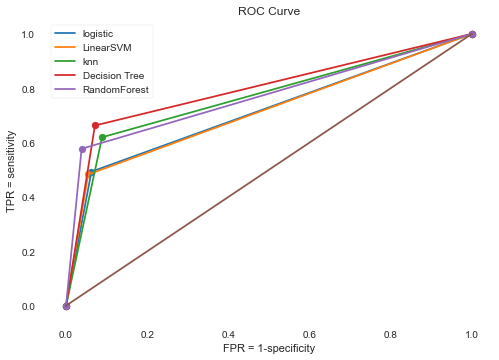

In [267]:
#logistic
fpr=arr[0]
tpr=arr[1]
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr)

#Linear SVM
fpr2=arr2[0]
tpr2=arr2[1]
plt.scatter(fpr2,tpr2)
plt.plot(fpr2,tpr2)

#Knn
fpr22=arr22[0]
tpr22=arr22[1]
plt.scatter(fpr22,tpr22)
plt.plot(fpr22,tpr22)


#decision_Tree
fpr3=arr3[0]
tpr3=arr3[1]
plt.scatter(fpr3,tpr3)
plt.plot(fpr3,tpr3)

#randomforest
fpr3=arr5[0]
tpr3=arr5[1]
plt.scatter(fpr3,tpr3)
plt.plot(fpr3,tpr3)


plt.plot([0,1],[0,1])
plt.title("ROC Curve")

plt.xlabel("FPR = 1-specificity")
plt.ylabel("TPR = sensitivity")
plt.legend(['logistic','LinearSVM',"knn","Decision Tree", 'RandomForest'])

plt.show()

#sns.lmplot(fpr,tpr)

## Conclusion

* In this file I tried only those machine learning models with are less require less computation power, and luckily knn was showing good results.
* KNN is one of the fastest model avaliable, if we don't have High computation power, we can always use it.
* Talking about important features, I can say that features like education, capital_gain, relationship, age etc. are quite important.
* In part 2 file I have applied heavy models as well.